In [ ]:
!pip install google_play_scraper -q
!pip install textblob -q
!pip install seaborn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV
  try:
    df_gjkrev = pd.read_csv(io.BytesIO(uploaded[fn]))
    print("Successfully loaded CSV into df_jknrev")
  except pd.errors.ParserError:
      print(f"Error: Could not parse {fn} as a CSV. Please upload a valid CSV file.")
      df_gjkrev = pd.DataFrame() # Create an empty DataFrame if parsing fails
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_gjkrev = pd.DataFrame()


Saving df_gjkrev.csv to df_gjkrev.csv
User uploaded file "df_gjkrev.csv" with length 75200931 bytes
Successfully loaded CSV into df_jknrev


/tmp/ipython-input-2433950350.py:13: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gjkrev = pd.read_csv(io.BytesIO(uploaded[fn]))


In [ ]:
df_gjkrev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0cb559ab-7fbe-4bc5-9348-e087c8270965,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Only 500 characters! Gofood gone downhill. Eli...,2,0,5.30.1,2025-09-08 02:45:13,"Hi John, we apologize for the inconvenience. T...",2025-09-08 07:00:08,5.30.1
1,b2673225-ccb7-494d-a275-df01a8f7cd05,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"[Update] Terkadang mengalami masalah, termasuk...",4,0,5.30.1,2025-09-08 02:30:18,"Hai Kak Aditya, mohon maaf atas ketidaknyamana...",2025-08-29 14:52:11,5.30.1
2,7835e8e8-4c5a-42b3-955c-794fde4b2207,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good driver,4,0,4.74.2,2025-09-08 01:28:41,NaN,NaN,4.74.2
3,d8078d68-918c-4c98-be78-cdd1b5c2396d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,oke,5,0,5.30.1,2025-09-08 01:05:19,NaN,NaN,5.30.1
4,8827a549-8cd9-4dd0-b899-0d3a4c492835,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,ditambahkan menu share route untuk tracking,4,0,5.30.1,2025-09-08 00:44:39,NaN,NaN,5.30.1
...,...,...,...,...,...,...,...,...,...,...,...
225973,f224a376-506a-441d-816d-0ff108b940a8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Love this app,5,0,1.0.1,2014-12-30 21:11:06,NaN,NaN,1.0.1
225974,3546eecc-a4d2-43de-8cdd-aa86ee424e28,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Akhirnya keluar juga!,5,0,1.0.1,2014-12-24 15:20:26,NaN,NaN,1.0.1
225975,b9440de2-b3a5-4f18-87cc-b27ad37ab081,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Finally,5,0,1.0.1,2014-12-23 05:04:16,NaN,NaN,1.0.1
225976,f39b66db-4fff-445a-abc2-74df2d54e2fe,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Helpful,4,0,NaN,2014-12-20 16:41:52,NaN,NaN,NaN


In [ ]:
df_gjkrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225978 entries, 0 to 225977
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              225978 non-null  object
 1   userName              225978 non-null  object
 2   userImage             225978 non-null  object
 3   content               225935 non-null  object
 4   score                 225978 non-null  int64 
 5   thumbsUpCount         225978 non-null  int64 
 6   reviewCreatedVersion  193385 non-null  object
 7   at                    225978 non-null  object
 8   replyContent          34939 non-null   object
 9   repliedAt             34939 non-null   object
 10  appVersion            193385 non-null  object
dtypes: int64(2), object(9)
memory usage: 19.0+ MB


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download Indonesian stopwords if not available
nltk.download('stopwords')
indonesian_stopwords = set(stopwords.words('indonesian'))

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_gjkrev[text_column].dropna().astype(str))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_gjkrev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Only 500 characters! Gofood gone downhill. Eli...,2,0,5.30.1,2025-09-08 02:45:13,"Hi John, we apologize for the inconvenience. T...",2025-09-08 07:00:08
1,"[Update] Terkadang mengalami masalah, termasuk...",4,0,5.30.1,2025-09-08 02:30:18,"Hai Kak Aditya, mohon maaf atas ketidaknyamana...",2025-08-29 14:52:11
2,Good driver,4,0,4.74.2,2025-09-08 01:28:41,NaN,NaN
3,oke,5,0,5.30.1,2025-09-08 01:05:19,NaN,NaN
4,ditambahkan menu share route untuk tracking,4,0,5.30.1,2025-09-08 00:44:39,NaN,NaN
...,...,...,...,...,...,...,...
225973,Love this app,5,0,1.0.1,2014-12-30 21:11:06,NaN,NaN
225974,Akhirnya keluar juga!,5,0,1.0.1,2014-12-24 15:20:26,NaN,NaN
225975,Finally,5,0,1.0.1,2014-12-23 05:04:16,NaN,NaN
225976,Helpful,4,0,NaN,2014-12-20 16:41:52,NaN,NaN


##Stopwords Removal
Indonesian Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(len(indonesian_stopwords))

758


,Word,Frequency
0,the,35152
1,good,29549
2,to,28052
3,driver,26695
4,gojek,24776
...,...,...
95,was,2976
96,harga,2916
97,or,2904
98,from,2901


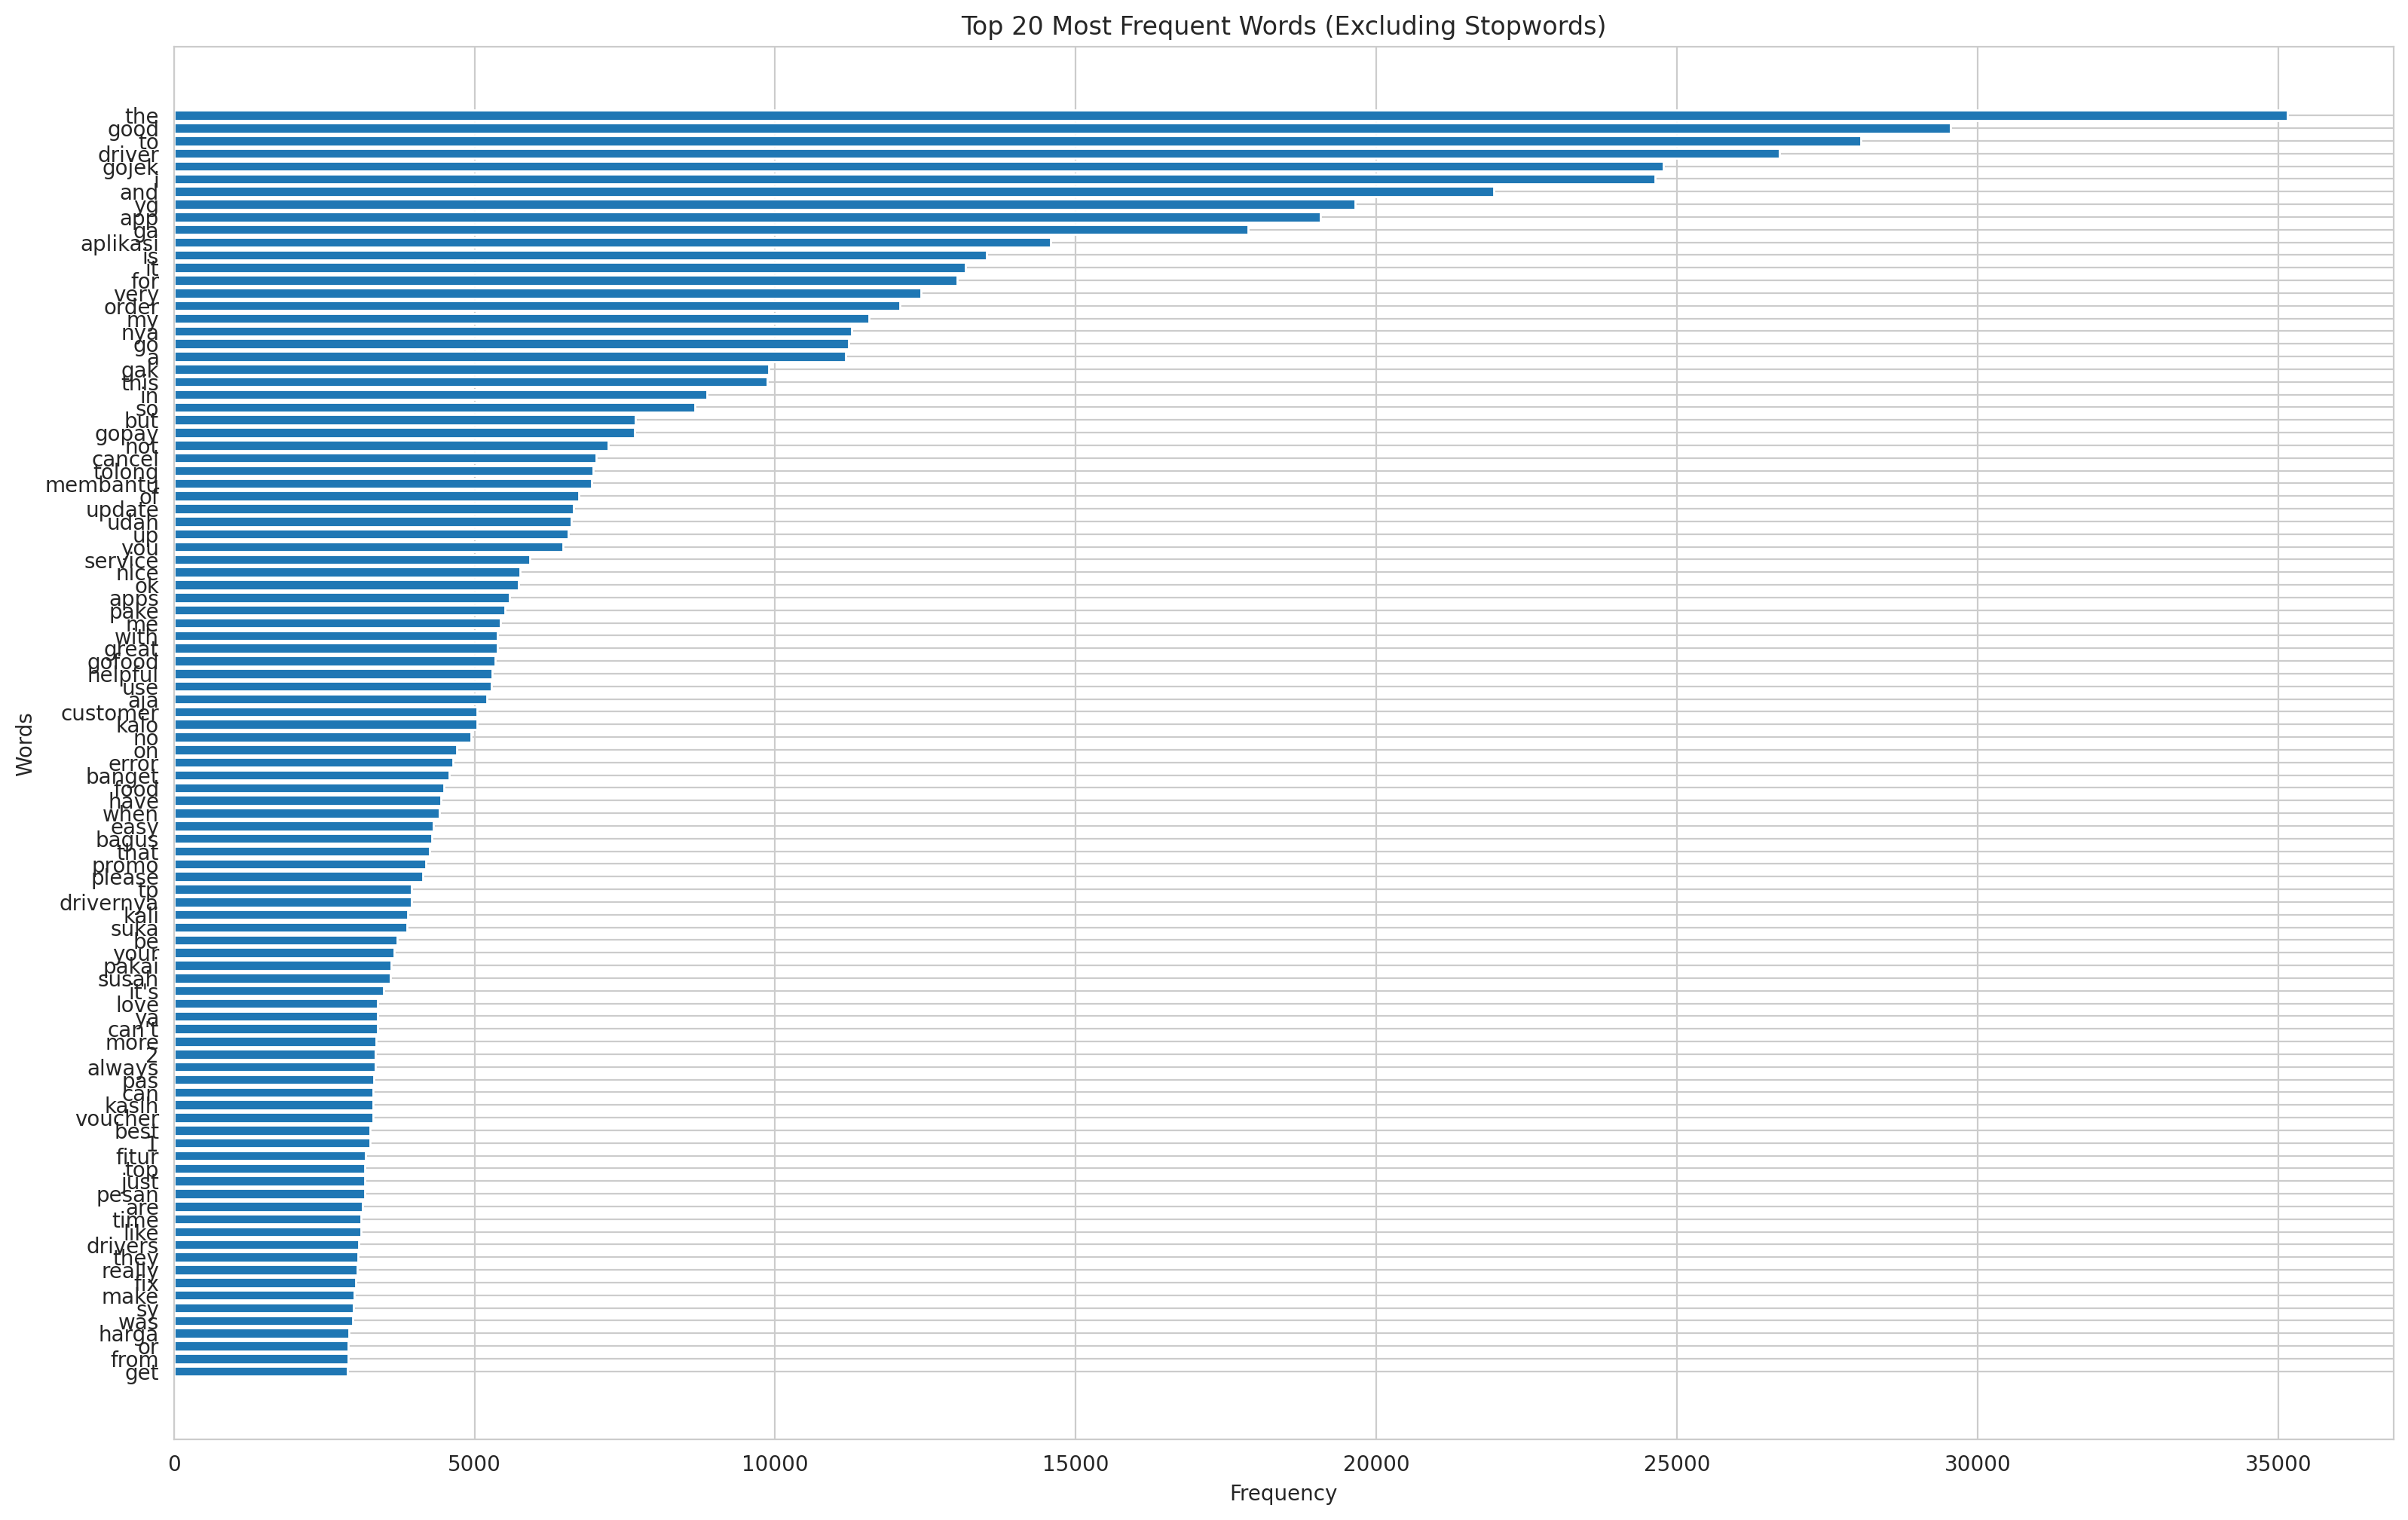

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_gjkrev[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.show()

In [ ]:
common_words

[('aplikasi', 4745),
 ('ga', 3050),
 ('update', 2726),
 ('login', 2511),
 ('gak', 2139),
 ('daftar', 2085),
 ('yg', 2029),
 ('good', 1915),
 ('bpjs', 1591),
 ('nya', 1547),
 ('app', 1491),
 ('verifikasi', 1416),
 ('aja', 1389),
 ('nomor', 1295),
 ('hp', 1266),
 ('data', 1168),
 ('membantu', 1164),
 ('tolong', 1126),
 ('the', 1125),
 ('to', 1117),
 ('captcha', 1114),
 ('udah', 1103),
 ('error', 1048),
 ('no', 997),
 ('mudah', 978),
 ('otp', 895),
 ('aplikasinya', 890),
 ('i', 873),
 ('faskes', 869),
 ('coba', 866),
 ('kode', 863),
 ('jkn', 816),
 ('bagus', 814),
 ('muncul', 807),
 ('susah', 766),
 ('masuk', 740),
 ('gagal', 732),
 ('email', 731),
 ('log', 719),
 ('ok', 694),
 ('kartu', 682),
 ('mohon', 676),
 ('mobile', 673),
 ('in', 667),
 ('and', 664),
 ('peserta', 645),
 ('pake', 645),
 ('password', 610),
 ('buka', 606),
 ('it', 585),
 ('ganti', 571),
 ('bikin', 566),
 ('pas', 566),
 ('kali', 556),
 ('banget', 553),
 ('pelayanan', 552),
 ('apps', 542),
 ('pakai', 535),
 ('tdk', 520),